In [1]:
#load your imports
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os

 #mne.tools are very useful!

In [2]:
#1 define path to data file
path = 'C:\\Users\\marti\\Desktop\\2020_2021\\Clases\\1st_Semester\\AAND\\TMS'
os.chdir(path)
files = os.listdir(path)

#2 find only the files with .vhdr file extensions     
files_vhdr = [f for f in files if f.endswith('.vhdr')]
print(files_vhdr)

['Subj8_TIS_rightTMS_baseline.vhdr', 'Subj8_TIS_rightTMS_stm_phase180.vhdr']


In [3]:
file = files_vhdr[0]
pick= ['EMG1','EMG2']
    #load raw data
raw = mne.io.read_raw_brainvision(file,preload=True)


Extracting parameters from Subj8_TIS_rightTMS_baseline.vhdr...
Setting channel info structure...
Reading 0 ... 1967414  =      0.000 ...   393.483 secs...


In [4]:
    #3 keep only the channels labeled 'EMG1','EMG2',  look into raw.pick_channels
raw.pick_channels(pick)
    #3a plot raw data
raw.plot(n_channels=2,duration=20)

<RawBrainVision | Subj8_TIS_rightTMS_baseline.eeg, 2 x 1967415 (393.5 s), ~30.0 MB, data loaded>

In [5]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: EMG1, EMG2
 chs: 2 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 2500.0 Hz
 meas_date: unspecified
 nchan: 2
 projs: []
 sfreq: 5000.0 Hz
>

In [6]:
Fs = 5e3
freq_notch= np.arange(50,2500,50)
#clean data
    #4 use a notch filter to eliminate 50Hz noise and its harmonics
filtered = raw.notch_filter(freqs=freq_notch)                                                                         
    #5 use a bandpass filter to have a low-pass filter of 500 and high-pass filter of 60 Hz
cleaned_data = raw.filter(l_freq=60,h_freq=500)
        
    # epoch cleaned data
    # define time window for MEP
tmin=-0.04
tmax=0.06
baseline = (None, 0)

    # define what events to use for epoching
events,events_id = mne.events_from_annotations(cleaned_data, event_id= {'Stimulus/A':1})

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 33001 samples (6.600 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 60 - 5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 60.00
- Lower transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 52.50 Hz)
- Upper passband edge: 500.00 Hz
- Upper transition bandwidth: 125.00 Hz (-6 dB cutoff frequency: 562.50 Hz)
- Filter length: 1101 samples (0.220 sec)

Used Annotations descriptions: ['Stimulus/A']


In [7]:
events

array([[  32439,       0,       1],
       [  80538,       0,       1],
       [ 109187,       0,       1],
       [ 157296,       0,       1],
       [ 198376,       0,       1],
       [ 225945,       0,       1],
       [ 258385,       0,       1],
       [ 297304,       0,       1],
       [ 346483,       0,       1],
       [ 395682,       0,       1],
       [ 424872,       0,       1],
       [ 474601,       0,       1],
       [ 523790,       0,       1],
       [ 561079,       0,       1],
       [ 606488,       0,       1],
       [ 635138,       0,       1],
       [ 670817,       0,       1],
       [ 718916,       0,       1],
       [ 763786,       0,       1],
       [ 812975,       0,       1],
       [ 854594,       0,       1],
       [ 880544,       0,       1],
       [ 927033,       0,       1],
       [ 975682,       0,       1],
       [1017841,       0,       1],
       [1062160,       0,       1],
       [1105950,       0,       1],
       [1141089,       0,   

In [8]:
    #6 epoch data at these events and time window
epochs_raw = mne.Epochs(cleaned_data,events,tmin=tmin,tmax=tmax,baseline=baseline)
    #7 average the epochs
epochs_avg = epochs_raw.average()

Not setting metadata
Not setting metadata
50 matching events found
Setting baseline interval to [-0.04, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


<IPython.core.display.Javascript object>


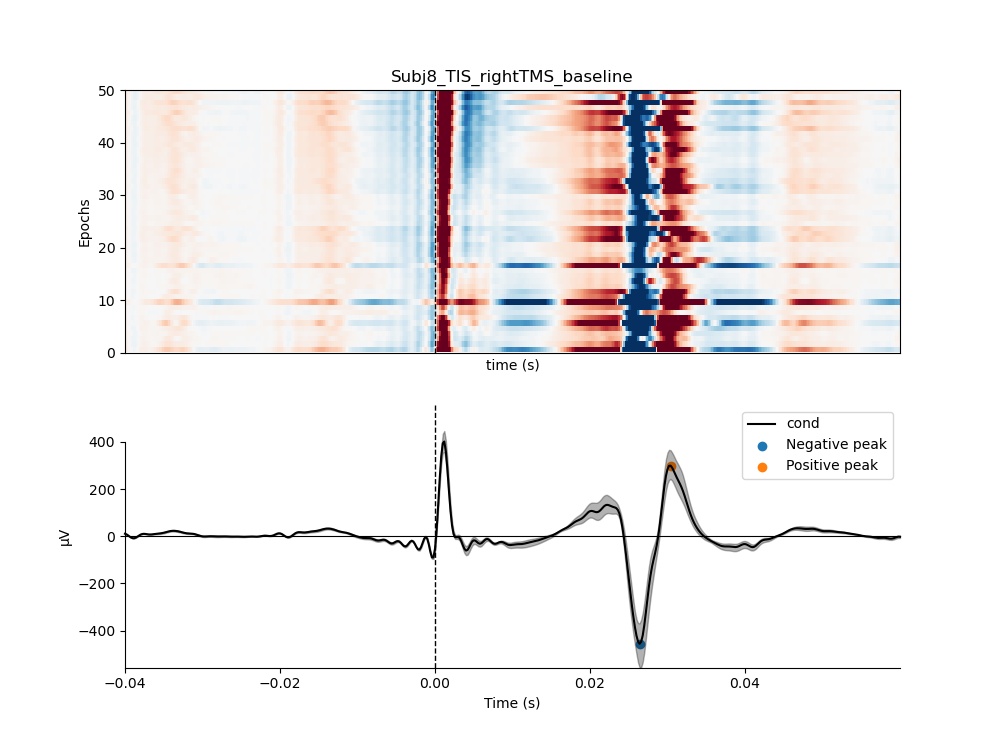

Loading data for 50 events and 501 original time points ...
Not setting metadata
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-54-ef62233e15aa>:22: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs_raw.plot_image(0,colorbar=False,axes=[axarr[row,col],axarr[row+1,col]],title=title,scalings=scaling, vmin=-voltagescale, vmax = voltagescale)


In [54]:
#MEP plot
scaling =1e6
    #time windows for negative and positive peak
neg_min=0.021
neg_max=0.028
pos_min=0.025
pos_max=0.033   

numcol=1
numrow = 2
row = 0
col = 0
f, axarr = plt.subplots(numrow, numcol, sharex='row', sharey='row', squeeze=False)
f.set_size_inches(10, 7.5)
title = file[:int(len(file) - 5)]
axarr[row, col].set_title(label=title, fontsize=8)  
axarr[row, col].set_xlabel('time (s)')

voltagescale = 200

        #8 plot_image of epochs_raw, place the image in row 0 and the ERP in row 1 of the axarr
epochs_raw.plot_image(0,colorbar=False,axes=[axarr[row,col],axarr[row+1,col]],title=title,scalings=scaling, vmin=-voltagescale, vmax = voltagescale)
        #9 calculate negative peak amplitude and positive peak amplitude within the time periods listed above
        #  look into epochs.get_peak(...)
neg_peak = epochs_avg.get_peak(tmin=neg_min,tmax=neg_max,return_amplitude=True,mode='neg')
pos_peak = epochs_avg.get_peak(tmin=pos_min,tmax=pos_max,return_amplitude=True,mode='pos')

        #10 plot negative and positive peak values on top of the Event Related Potential plot
axarr[row+1,col].scatter(neg_peak[1],neg_peak[2]*10**6,label='Negative peak')
axarr[row+1, col].scatter(pos_peak[1],pos_peak[2]*10**6,label='Positive peak')

        #11 calculate the peak to peak value
peak2peak= np.abs(pos_peak[2]-neg_peak[2])
        #12 in the legend of the ERP plot, print the peak to peak value and the labels of the pos and neg peak

axarr[row+1,col].legend()

In [10]:
#13 make a function that takes a file path as input and outputs a figure, using necessary steps from above
#   call this function for both datasets 

def MEP_plot(path,pick)
    os.chdir(path)
    files = os.listdir(path)   
    files_vhdr = [f for f in files if f.endswith('.vhdr')]
    
    raw = mne.io.read_raw_brainvision(file,preload=True)
    raw.pick_channels(pick)
    freq_notch= np.arange(50,2500,50)
    #clean data
        #4 use a notch filter to eliminate 50Hz noise and its harmonics
    filtered = raw.notch_filter(freqs=freq_notch)                                                                         
        #5 use a bandpass filter to have a low-pass filter of 500 and high-pass filter of 60 Hz
    cleaned_data = raw.filter(l_freq=60,h_freq=500)

        # epoch cleaned data
        # define time window for MEP
    tmin=-0.04
    tmax=0.06
    baseline = (None, 0)

        # define what events to use for epoching
    events,events_id = mne.events_from_annotations(cleaned_data, event_id= {'Stimulus/A':1})
    
    
    .... SHOULD END THIS